In [41]:
# import the necessary packages
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

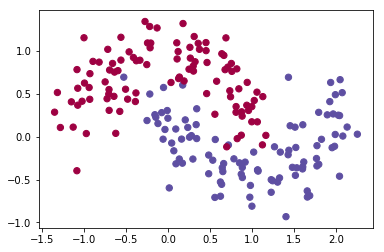

In [42]:
%matplotlib inline 
# Generate a dataset and plot it
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [43]:
# X and Y should be of the shape (no_of_features, no_of_examples)
X = X.T
y = y.reshape(y.shape[0],1).T
print(X.shape)
print(y.shape)

(2, 200)
(1, 200)


In [44]:
m = X.shape[1] #number of examples
n_x = X.shape[0] # input layer
#n_h = 3
n_y = y.shape[0] # output layer
learning_rate = 0.1 # learning rate

In [45]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [46]:
# Helper function to initialize the parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [47]:
# Helper function to do a forward pass on the training set.
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [48]:
# Helper function to compute the total cost
def compute_cost(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -(1/m) * np.sum(logprobs)
    
    cost = np.squeeze(cost)
    return cost

In [49]:
#Helper function to do back propagation.
def backward_propagation(parameters, cache, X, Y):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1**2)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [50]:
#Helper function to an update of the parameters using gradient descent.
def update_parameters(parameters, grads):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [51]:
#This function learns the parameters of the neural network and returns the parameters that can be used for making predictions.
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters
    
    

In [52]:
parameters = nn_model(X, y, n_h = 4, num_iterations=20000, print_cost=True)